In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import pathlib
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

In [0]:
tf.version.VERSION

'2.1.0'

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(X_tr, y_tr), (X_te, y_te) = fashion_mnist.load_data()

X_tr = (X_tr/255.).astype(np.float32)
Y_tr = np.zeros((60000, 10)).astype(np.float32)
Y_tr[np.arange(60000), y_tr] = 1

X_te = (X_te/255.).astype(np.float32)
Y_te = np.zeros((10000, 10)).astype(np.float32)
Y_te[np.arange(10000), y_te] = 1

CLASSES = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

4423680/4422102 [==============================] - 0s 0us/step


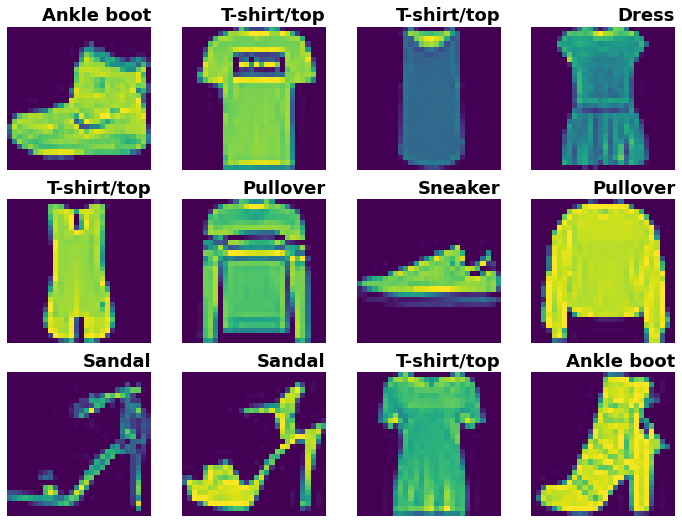

In [0]:
def grid(X, fig=None, labels=None, fontsize=18):
    for i, (x, ax) in enumerate(zip(X, fig.axes)):
        ax.imshow(x)
        ax.set_axis_off()
    if labels is not None:
        for ax, label in zip(fig.axes, list(labels)):
            ax.set_title(str(label), fontsize=fontsize, fontweight="bold", loc="right")
    for i, ax in enumerate(fig.axes):
        if i >= len(X):
            ax.remove()

fig, _ = plt.subplots(3, 4, figsize=(12,9))
grid(X_tr[:12, :], fig, labels=[CLASSES[c] for c in y_tr[:12]])

In [0]:
model = Sequential([Input((28, 28)),
                    Flatten(),
                    Dense(256, activation="relu"),
                    Dense(128, activation="relu"),
                    Dense(64, activation="relu"),
                    Dense(10, activation="softmax")])
model.summary()
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model.fit(X_tr, Y_tr, epochs=20, batch_size=32, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 6s 117us

In [0]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [0]:
model.fit(X_tr, Y_tr, epochs=20, batch_size=32, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s 82us/sample - loss: 0.2442 - accuracy: 0.9119 - val_loss: 0.3188 - val_accuracy: 0.8851
Epoch 2/20
48000/48000 [==============================] - 4s 77us/sample - loss: 0.2388 - accuracy: 0.9124 - val_loss: 0.3510 - val_accuracy: 0.8777
Epoch 3/20
48000/48000 [==============================] - 4s 74us/sample - loss: 0.2342 - accuracy: 0.9149 - val_loss: 0.3131 - val_accuracy: 0.8851
Epoch 4/20
48000/48000 [==============================] - 4s 78us/sample - loss: 0.2286 - accuracy: 0.9171 - val_loss: 0.3220 - val_accuracy: 0.8855
Epoch 5/20
48000/48000 [==============================] - 4s 76us/sample - loss: 0.2231 - accuracy: 0.9187 - val_loss: 0.3166 - val_accuracy: 0.8858
Epoch 6/20
48000/48000 [==============================] - 4s 78us/sample - loss: 0.2180 - accuracy: 0.9210 - val_loss: 0.3162 - val_accuracy: 0.8873
Epoch 7/20
48000/48000 [==============================] 

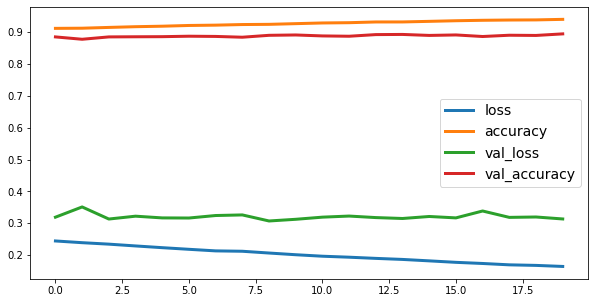

In [0]:
plt.figure(figsize=(10, 5))
for k in model.history.history:
  plt.plot(model.history.history[k], lw=3, label=k)
plt.legend(fontsize=14)

In [0]:
model = Sequential([Input((28, 28)),
                    Flatten(),
                    Dense(256, activation="relu"),
                    Dropout(0.2),
                    Dense(128, activation="relu"),
                    Dense(64, activation="relu"),
                    Dropout(0.2),
                    Dense(10, activation="softmax")])
model.summary()
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model.fit(X_tr, Y_tr, epochs=20, batch_size=32, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

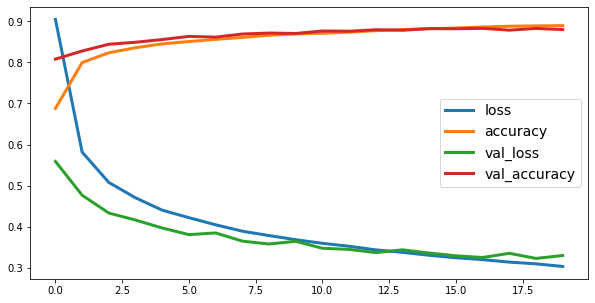

In [0]:
plt.figure(figsize=(10, 5))
for k in model.history.history:
  plt.plot(model.history.history[k], lw=3, label=k)
plt.legend(fontsize=14)